In [1]:
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df_org = pd.read_csv('/content/drive/MyDrive/CodingFiles/BenefitCodingv6.csv')
df_org = df_org.sample(frac=1.0, random_state=42)
df_org.head()

Mounted at /content/drive


,text,category
7958,Immediate results were evident and very satisf...,Fast or immediate results
9578,Long-term efficacy is objective and worth cons...,Long-term or Sustained efficacy
7049,I think that the new mechanism of action is an...,Other
18789,this product is designed to be very easy to us...,Easy to use or administer
9864,My daily satisfaction has improved with Hypoth...,Improves quality of life


In [3]:
labels = df_org['category'].unique().tolist()
labels = [s.strip() for s in labels ]
labels

['Fast or immediate results',
 'Long-term or Sustained efficacy',
 'Other',
 'Easy to use or administer',
 'Improves quality of life',
 'Good efficacy or results',
 'Oral route or tablet formulation',
 'Good side effect profile',
 'Good safety or higher safety compared to others',
 'Cheap or Affordable']

In [4]:
for key, value in enumerate(labels):
    print(value)

Fast or immediate results
Long-term or Sustained efficacy
Other
Easy to use or administer
Improves quality of life
Good efficacy or results
Oral route or tablet formulation
Good side effect profile
Good safety or higher safety compared to others
Cheap or Affordable


In [5]:
NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [6]:
label2id

{'Fast or immediate results': 0,
 'Long-term or Sustained efficacy': 1,
 'Other': 2,
 'Easy to use or administer': 3,
 'Improves quality of life': 4,
 'Good efficacy or results': 5,
 'Oral route or tablet formulation': 6,
 'Good side effect profile': 7,
 'Good safety or higher safety compared to others': 8,
 'Cheap or Affordable': 9}

In [7]:
id2label

{0: 'Fast or immediate results',
 1: 'Long-term or Sustained efficacy',
 2: 'Other',
 3: 'Easy to use or administer',
 4: 'Improves quality of life',
 5: 'Good efficacy or results',
 6: 'Oral route or tablet formulation',
 7: 'Good side effect profile',
 8: 'Good safety or higher safety compared to others',
 9: 'Cheap or Affordable'}

In [8]:
df_org["labels"]=df_org.category.map(lambda x: label2id[x.strip()])

In [9]:
df_org.head()

,text,category,labels
7958,Immediate results were evident and very satisf...,Fast or immediate results,0
9578,Long-term efficacy is objective and worth cons...,Long-term or Sustained efficacy,1
7049,I think that the new mechanism of action is an...,Other,2
18789,this product is designed to be very easy to us...,Easy to use or administer,3
9864,My daily satisfaction has improved with Hypoth...,Improves quality of life,4


<Axes: ylabel='count'>

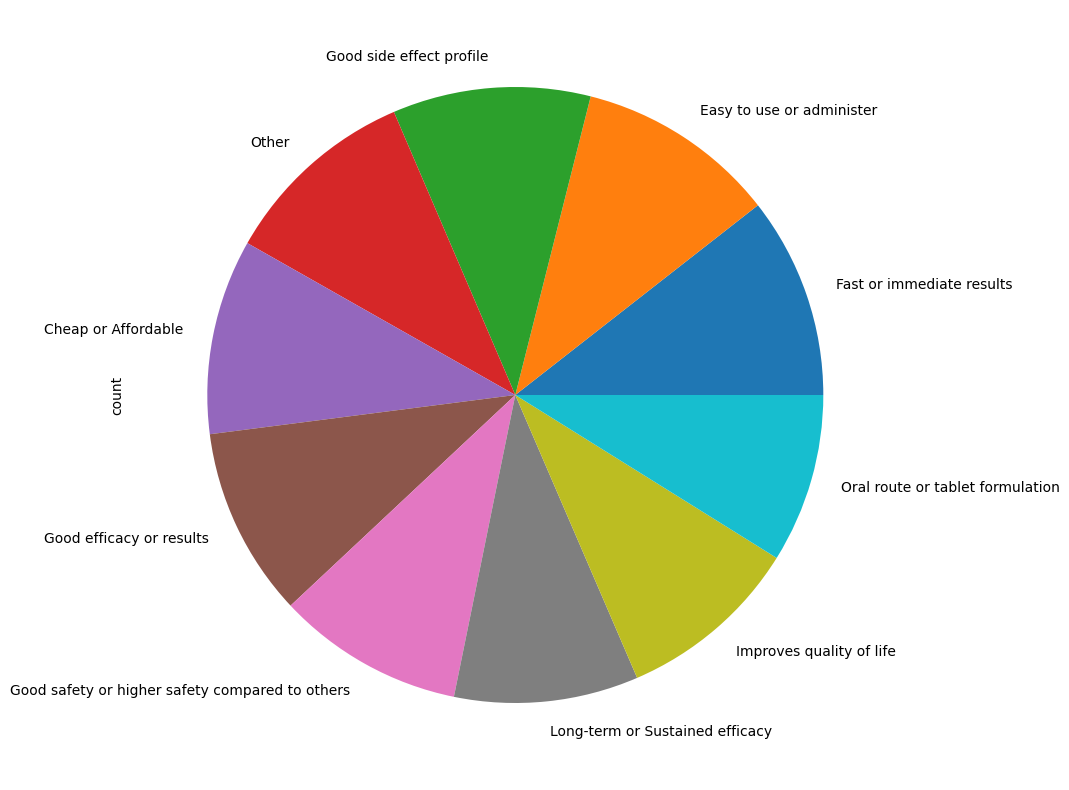

In [10]:
df_org.category.value_counts().plot(kind='pie', figsize=(10,10))

In [11]:
tokenizer = BertTokenizerFast.from_pretrained("distilbert/distilbert-base-uncased", max_length=512)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.


In [12]:
model = BertForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)
model.to(device)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.ou

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [13]:
SIZE= df_org.shape[0]

train_texts= list(df_org.text[:SIZE//2])

val_texts=   list(df_org.text[SIZE//2:(3*SIZE)//4 ])

test_texts=  list(df_org.text[(3*SIZE)//4:])

train_labels= list(df_org.labels[:SIZE//2])

val_labels=   list(df_org.labels[SIZE//2:(3*SIZE)//4])

test_labels=  list(df_org.labels[(3*SIZE)//4:])
train_texts = [str(text) for text in train_texts]
val_texts = [str(text) for text in val_texts]
test_texts = [str(text) for text in test_texts]

In [14]:
len(train_texts), len(val_texts), len(test_texts)

(10447, 5223, 5224)

In [15]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [18]:
class DataLoader(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):

        return len(self.labels)

In [19]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)

test_dataset = DataLoader(test_encodings, test_labels)

In [20]:
from transformers import TrainingArguments, Trainer

In [21]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):

    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [22]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./TTC4900Model',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [23]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
     # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
    compute_metrics= compute_metrics
)

In [24]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,2.288500,2.157647,0.255600,0.146463,0.200418,0.264011
100,1.623600,0.929808,0.690025,0.686075,0.766867,0.696719
150,0.855100,0.686413,0.775416,0.775349,0.834970,0.776062
200,0.715700,0.473655,0.859276,0.858957,0.880342,0.861416
250,0.388600,0.301695,0.927053,0.928161,0.933203,0.928057
300,0.373900,0.408097,0.888187,0.884798,0.903460,0.890050
350,0.278600,0.319880,0.913077,0.914120,0.925293,0.914579
400,0.309600,0.206074,0.948306,0.946801,0.947579,0.948682
450,0.230200,0.199668,0.946200,0.947530,0.949445,0.947307
500,0.174500,0.245935,0.945817,0.945890,0.948382,0.946377


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1959, training_loss=0.24796789664929164, metrics={'train_runtime': 464.0624, 'train_samples_per_second': 67.536, 'train_steps_per_second': 4.221, 'total_flos': 1175806993246956.0, 'train_loss': 0.24796789664929164, 'epoch': 3.0})

In [25]:
q=[trainer.evaluate(eval_dataset=df_org) for df_org in [train_dataloader, val_dataloader, test_dataset]]

pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.022188,0.994831,0.994882,0.994823,0.994951
val,0.069104,0.986215,0.986100,0.985943,0.986369
test,0.100356,0.981432,0.981569,0.981526,0.981744


In [26]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

In [27]:
def predict(text):

    # Tokenize the input text and move tensors to the GPU if available
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to(device)

    # Get model output (logits)
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)

    # Get the index of the class with the highest probability
    # argmax() finds the index of the maximum value in the tensor along a specified dimension.
    # By default, if no dimension is specified, it returns the index of the maximum value in the flattened tensor.
    pred_label_idx = probs.argmax()

    # Now map the predicted class index to the actual class label
    # Since pred_label_idx is a tensor containing a single value (the predicted class index),
    # the .item() method is used to extract the value as a scalar
    pred_label = model.config.id2label[pred_label_idx.item()]
   # print("Avaliable classes to code-in \n 1- Fast or immediate results / 2 - Good efficacy or results / 3 - Good safety or higher safety compared to others / 4 - Good side effect profile / 5 - Oral route or tablet formulation / 6 - Easy to use or administer / 7 - Cheap or Affordable / 8 - Long-term or Sustained efficacy / 9 - Improves quality of life / 10 - Other")

    return probs, pred_label_idx, pred_label

In [28]:
# Test with a an example text in Turkish
text = "cheaper than other"
# "Machine Learning itself is moving towards more and more automated"
predict(text)

(tensor([[3.6525e-05, 1.0117e-04, 3.1033e-04, 2.5275e-05, 4.3886e-05, 5.0119e-05,
          3.5057e-05, 4.4533e-05, 7.5311e-05, 9.9928e-01]], device='cuda:0',
        grad_fn=<SoftmaxBackward0>),
 tensor(9, device='cuda:0'),
 'Cheap or Affordable')

In [29]:
model_path = "TrainedBERTModel"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('TrainedBERTModel/tokenizer_config.json',
 'TrainedBERTModel/special_tokens_map.json',
 'TrainedBERTModel/vocab.txt',
 'TrainedBERTModel/added_tokens.json',
 'TrainedBERTModel/tokenizer.json')

In [32]:
model_path = "TrainedBERTModel"

model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
nlp= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [33]:
nlp("It can significantly improve patients' quality of life.")


[{'label': 'Improves quality of life', 'score': 0.999339759349823}]

In [34]:
nlp("best results")


[{'label': 'Good efficacy or results', 'score': 0.9988522529602051}]

In [35]:
nlp("less cost than other")

[{'label': 'Cheap or Affordable', 'score': 0.9993470311164856}]

In [36]:
from google.colab import files
import shutil

shutil.make_archive('TrainedBERTModel', 'zip', 'TrainedBERTModel')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('TrainedBERTModel.zip')